<a href="https://colab.research.google.com/github/jos-g/estimativa-de-pi/blob/main/relatorio_1mecfis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bibliotecas

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy import stats as st 
from scipy.stats import norm

# ---- #


In [2]:
from google.colab import files
uploaded = files.upload()

Saving med_paper.xlsx to med_paper.xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['med_paper.xlsx']))
df

,Comprimento (cm),Diâmetro (cm)
0,45.40,15.10
1,46.40,15.12
2,46.38,15.00
3,46.50,15.20
4,46.30,15.11
5,46.29,15.09
6,46.31,15.09
7,46.30,15.10
8,46.29,15.00
9,46.30,15.00


**Dados Circunferência Papel**

In [4]:
array_1 = df.iloc[: , 0]
array_1 

0    45.40
1    46.40
2    46.38
3    46.50
4    46.30
5    46.29
6    46.31
7    46.30
8    46.29
9    46.30
Name: Comprimento (cm), dtype: float64

In [5]:
array_2 = df.iloc[:, 1]
array_2

0    15.10
1    15.12
2    15.00
3    15.20
4    15.11
5    15.09
6    15.09
7    15.10
8    15.00
9    15.00
Name:  Diâmetro (cm), dtype: float64

In [6]:
N = array_1.size
N

10

# Médias

In [7]:
media_c = np.sum(array_1) / N 
print("Média do Comprimento (cm): {}".format(media_c))

Média do Comprimento (cm): 46.247


In [8]:
media_d = np.sum(array_2) / N
print("Média do Diâmetro (cm): {}".format(media_d))

Média do Diâmetro (cm): 15.081


#Desvio Padrão

In [9]:
desvio_1 = np.std(array_1, ddof=1)
print("Desvio Padrão comprimento (cm): {}".format(desvio_1))

Desvio Padrão comprimento (cm): 0.30525217261944115


In [10]:
desvio_2 = np.std(array_2, ddof=1)
print("Desvio Padrão diâmetro (cm): {}".format(desvio_2))

Desvio Padrão diâmetro (cm): 0.06419588079550805


# Erros

In [11]:
e_med = 0.002

In [12]:
sigma_1 = desvio_1 / np.sqrt(N)
sigma_1

0.09652921261923206

In [13]:
sigma_2 = desvio_2 / np.sqrt(N)
sigma_2

0.020300519971446735

In [14]:
sigma_c1 = np.sqrt((sigma_1)**2 + (e_med)**2)
sigma_c1

0.09654992951260456

In [15]:
sigma_d1 = np.sqrt((sigma_2)**2 + (e_med)**2)
sigma_d1

0.020398801707725574

In [16]:
sigma_t = np.sqrt((sigma_c1)**2 + (sigma_d1)**2)
sigma_t

0.09868130522039124

In [17]:
print ("Comprimento (cm) = {:.2f} ± {:.2f} cm".format( np.round(media_c, 2), np.round(sigma_t, 2)))


Comprimento (cm) = 46.25 ± 0.10 cm


In [18]:
print ("Diâmetro (cm) = {:.2f} ± {:.2f} cm".format( np.round(media_d, 2), np.round(sigma_t, 2)))

Diâmetro (cm) = 15.08 ± 0.10 cm


# Estimativa de pi

In [19]:
pi = media_c / media_d 
print("pi: {}".format(pi))

pi: 3.066573834626351


In [20]:
#incertezas
inp = pi*np.sqrt((sigma_c1/media_c)**2 + (sigma_d1/media_d)**2)
print("Incerteza de pi: {}".format(inp))

Incerteza de pi: 0.00762835584345857


In [21]:
pi + inp

3.07420219046981

In [22]:
#discrepância
dis_c = np.sqrt((pi - math.pi)**2)
print(dis_c)

0.07501881896344198


In [23]:
inp / dis_c

0.10168589627058786

In [24]:
#erro relativo
er_1 = inp / pi
print(er_1)

0.0024875826426621985


In [25]:
er_1*100

0.24875826426621986

In [26]:
print ("Valor de pi = {:.2f} ± {:.2f} cm".format( np.round(pi, 2), np.round(inp, 2)))

Valor de pi = 3.07 ± 0.01 cm


In [27]:
2*inp

0.01525671168691714

# Gráficos


Text(0.0, 0.05, '$ \\pi \\pm 3\\sigma_{\\overline{\\rm{L}}} = (3.04,3.09)$ (cm)')

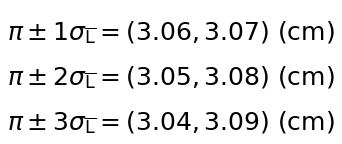

In [51]:
fig = plt.figure( figsize=(8,6) )

media_menos_1sigma = pi - inp
media_mais_1sigma = pi  + inp
media_menos_2sigma = pi- 2 * inp
media_mais_2sigma = pi + 2 * inp
media_menos_3sigma = pi- 3 * inp
media_mais_3sigma = pi + 3 * inp
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

str_ = r"$ \pi  \pm 1\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_1sigma, 2 ), np.round( media_mais_1sigma, 2 ) )
ax.text(0., 0.75, str_, size=25)
str_ = r"$ \pi\pm 2\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_2sigma, 2 ), np.round( media_mais_2sigma, 2 ) )
ax.text(0., 0.40, str_, size=25)
str_ = r"$ \pi \pm 3\sigma_{\overline{\rm{L}}} = (%.2f,%.2f)$ (cm)" % ( np.round( media_menos_3sigma, 2 ), np.round( media_mais_3sigma, 2 ) )
ax.text(0., 0.05, str_, size=25)

Text(0, 0.5, 'Distribuição')

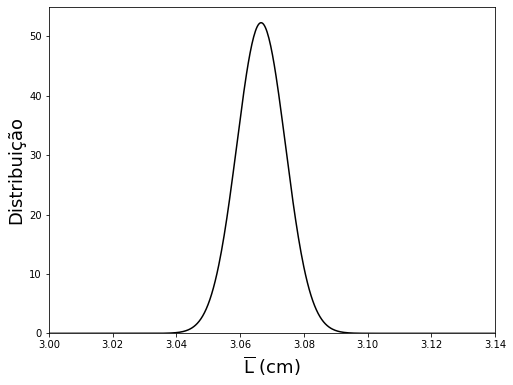

In [43]:
x_min = 3.00
x_max = 3.14

sigma_ = inp
rv = norm( loc=pi, scale=sigma_ )

fig = plt.figure( figsize=(8,6) )

X = np.linspace( x_min, x_max, 500 )

plt.plot( X, rv.pdf( X ), 'k-' )
plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
plt.xlabel( r"$\overline{\rm{L}}$ (cm)", fontsize=18 )
plt.ylabel( "Distribuição", fontsize=18 )

Text(0, 0.5, 'Distribuição (log)')

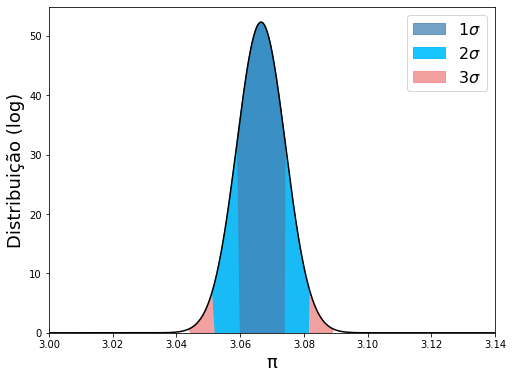

In [45]:
fig = plt.figure( figsize=(8,6) )

X_1sigma = X[ (X >= media_menos_1sigma) & (X <= media_mais_1sigma) ]
X_2sigma = X[ (X >= media_menos_2sigma) & (X <= media_mais_2sigma) ]
X_3sigma = X[ (X >= media_menos_3sigma) & (X <= media_mais_3sigma) ]

plt.plot( X, rv.pdf( X ), 'k-' )
plt.fill( np.concatenate( ( [ X_3sigma[3] ], X_3sigma, [ X_3sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma ), [ 0. ] ) ), color="lightcoral", alpha=0.75, label=r"$3\sigma$" )
plt.fill( np.concatenate( ( [ X_2sigma[3] ], X_2sigma, [ X_2sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_2sigma ), [ 0. ] ) ), color="deepskyblue", alpha=0.90, label=r"$2\sigma$" )
plt.fill( np.concatenate( ( [ X_1sigma[3] ], X_1sigma, [ X_1sigma[-2] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_1sigma ), [ 0. ] ) ), color="steelblue", alpha=0.75, label=r"$1\sigma$" )
handles, labels = plt.gca().get_legend_handles_labels()
order_ = [ 2, 1, 0 ]
handles_new = [ handles[idx_] for idx_ in order_ ]
labels_new = [ labels[idx_] for idx_ in order_ ]
#plt.legend( loc='best', fontsize=16 )
plt.legend( handles_new, labels_new, loc='best', fontsize=16 )

plt.xlim( x_min, x_max )
plt.ylim( bottom=0. )
#plt.yscale( 'log' )
plt.xlabel( r"π", fontsize=18 )
plt.ylabel( "Distribuição (log)", fontsize=18 )